In [1]:
## Imports
import os
import random

import numpy as np
import cv2
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint

## Seeding 
seed = 2019
random.seed = seed
np.random.seed = seed
tf.seed = seed
%matplotlib inline
#The line above is necesary to show Matplotlib's plots inside a Jupyter Notebook
import os
os.chdir('E:\\PlotDel_Steven\\sen_proj')

In [2]:
from fpackage.resnet50_unet import DataGen, build_resnet50_unet

**Path**

In [3]:
data_dir= "../"

In [4]:
dataset_path = data_dir + "Data/dataset"

**Hyperparameters**

In [5]:
image_size = 512
batch_size = 8

In [6]:
train_images_path = dataset_path + "/training/images"
val_images_path = dataset_path + "/validation/images"
test_images_path = dataset_path + "/test/images"
train_ids = []
valid_ids = []
test_ids = []
for (dirpath, dirnames, filenames) in os.walk(train_images_path):
    train_ids.extend(filenames)
for (dirpath, dirnames, filenames) in os.walk(val_images_path):
    valid_ids.extend(filenames)
for (dirpath, dirnames, filenames) in os.walk(test_images_path):
    test_ids.extend(filenames)

In [7]:
train_ids[:5]

['tile_0-3584.png',
 'tile_0-3840.png',
 'tile_0-4096.png',
 'tile_0-4352.png',
 'tile_0-4608.png']

In [8]:
valid_ids[:5]

['tile_8192-4864.png',
 'tile_8192-5120.png',
 'tile_8192-5376.png',
 'tile_8192-5888.png',
 'tile_8192-6144.png']

In [9]:
test_ids[:5]

['tile_9216-2560.png',
 'tile_9216-2816.png',
 'tile_9216-3072.png',
 'tile_9216-3328.png',
 'tile_9216-3584.png']

In [10]:
train_path = dataset_path + "/training/"
val_path = dataset_path + "/validation/"
test_path = dataset_path + "/test/"

In [11]:
image = cv2.imread(train_path + "images/" + train_ids[0])
image = cv2.resize(image, (128, 128))

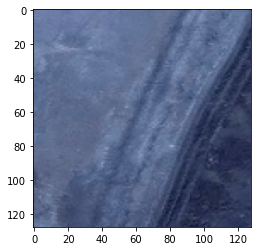

In [12]:
plt.imshow(image)
plt.show()
# cv2.imshow(image)

In [13]:
image = cv2.imread(val_path + "images/" + valid_ids[0])
image = cv2.resize(image, (128, 128))

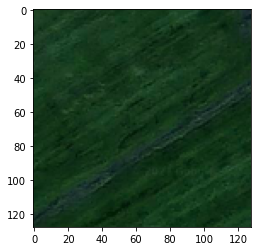

In [14]:
plt.imshow(image)
plt.show()
# cv2_imshow(image)

In [15]:
image = cv2.imread(test_path + "images/" + test_ids[-5])
image = cv2.resize(image, (512, 512))

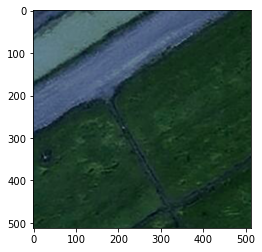

In [16]:
plt.imshow(image)
plt.show()
# cv2_imshow(image)

In [17]:
traingen = DataGen(train_ids, train_path, batch_size=batch_size, image_size=image_size)
x, y = traingen.__getitem__(2)
print(x.shape, y.shape)

(8, 512, 512, 3) (8, 512, 512, 1)


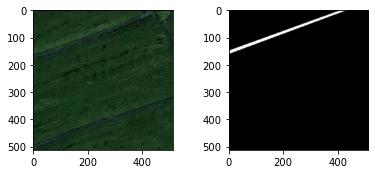

In [18]:
r = random.randint(0, len(x)-1)

fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.4)
ax = fig.add_subplot(1, 2, 1)
ax.imshow(x[r])
ax = fig.add_subplot(1, 2, 2)
ax.imshow(np.reshape(y[r]*255, (image_size, image_size)), cmap="gray")

In [19]:
id_name = valid_ids[0]

In [20]:
image_path = os.path.join(val_path, "images", id_name)

In [21]:
image = cv2.imread(image_path)
image = cv2.resize(image, (128, 128))

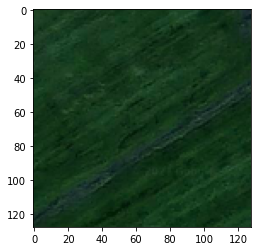

In [22]:
plt.imshow(image)
plt.show()

In [23]:
valgen = DataGen(valid_ids, val_path, batch_size=batch_size, image_size=image_size)
x, y = valgen.__getitem__(2)
print(x.shape, y.shape)

(8, 512, 512, 3) (8, 512, 512, 1)


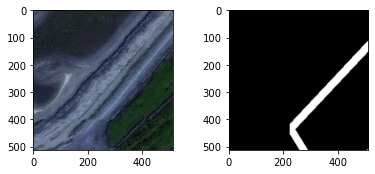

In [24]:
r = random.randint(0, len(x)-1)

fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.4)
ax = fig.add_subplot(1, 2, 1)
ax.imshow(x[r])
ax = fig.add_subplot(1, 2, 2)
ax.imshow(np.reshape(y[r]*255, (image_size, image_size)), cmap="gray")

In [25]:
testgen = DataGen(test_ids, test_path, batch_size=batch_size, image_size=image_size)
x, y = testgen.__getitem__(2)
print(x.shape, y.shape)

(8, 512, 512, 3) (8, 512, 512, 1)


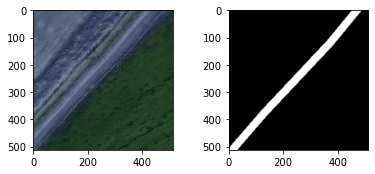

In [26]:
r = random.randint(0, len(x)-1)

fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.4)
ax = fig.add_subplot(1, 2, 1)
ax.imshow(x[r])
ax = fig.add_subplot(1, 2, 2)
ax.imshow(np.reshape(y[r]*255, (image_size, image_size)), cmap="gray")

**Different Blocks**

## Get the ResNet50 model

**RESNET-UNET**

In [29]:
input_shape = (512, 512, 3)
model = build_resnet50_unet(input_shape)
#model.summary()

hi



**Training**

In [34]:
train_gen = DataGen(train_ids, train_path, image_size=image_size, batch_size=batch_size)
valid_gen = DataGen(valid_ids, val_path, image_size=image_size, batch_size=batch_size)
test_gen = DataGen(test_ids, test_path, batch_size=5, image_size=image_size)

In [35]:
train_steps = len(train_ids)//batch_size
valid_steps = len(valid_ids)//batch_size

epochs = 20

model_checkpoint = ModelCheckpoint(dataset_path + "/ResNet_UNet.h5", monitor='loss', verbose=1, save_best_only=True)
history = model.fit(train_gen, validation_data=valid_gen, steps_per_epoch=train_steps, validation_steps=valid_steps, epochs=epochs, verbose=1,callbacks=[model_checkpoint])



Epoch 1/20
162/162 [==============================] - 4149s 26s/step - loss: 0.0685 - accuracy: 0.9161 - val_loss: 0.0588 - val_accuracy: 0.9271

Epoch 00001: loss improved from inf to 0.06853, saving model to ../Data/dataset\ResNet_UNet.h5


C:\ProgramData\Anaconda3\envs\py36\lib\site-packages\tensorflow\python\keras\utils\generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 2/20
162/162 [==============================] - 2859s 18s/step - loss: 0.0509 - accuracy: 0.9331 - val_loss: 0.0610 - val_accuracy: 0.9263

Epoch 00002: loss improved from 0.06853 to 0.05094, saving model to ../Data/dataset\ResNet_UNet.h5
Epoch 3/20
162/162 [==============================] - 2859s 18s/step - loss: 0.0477 - accuracy: 0.9365 - val_loss: 0.0602 - val_accuracy: 0.9263

Epoch 00003: loss improved from 0.05094 to 0.04773, saving model to ../Data/dataset\ResNet_UNet.h5
Epoch 4/20
162/162 [==============================] - 2867s 18s/step - loss: 0.0502 - accuracy: 0.9320 - val_loss: 0.0612 - val_accuracy: 0.9263

Epoch 00004: loss did not improve from 0.04773
Epoch 5/20
162/162 [==============================] - 2866s 18s/step - loss: 0.0460 - accuracy: 0.9367 - val_loss: 0.0607 - val_accuracy: 0.9263

Epoch 00005: loss improved from 0.04773 to 0.04598, saving model to ../Data/dataset\ResNet_UNet.h5
Epoch 6/20
162/162 [==============================] - 2863s 18s/step - l

**Visualize performance**

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


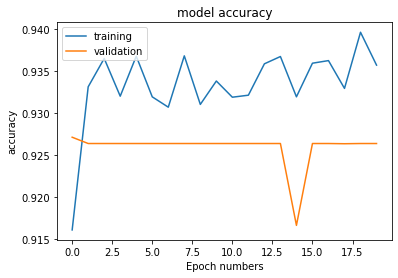

In [36]:
print(history.history.keys())
#  "Accuracy"
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('Epoch numbers')
plt.legend(['training', 'validation'], loc='upper left')
plt.show()

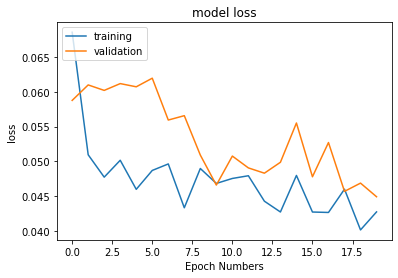

In [37]:
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('Epoch Numbers')
plt.legend(['training', 'validation'], loc='upper left')
plt.show()